# YOCP Simulation

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
import seaborn as sns


# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('tutorial_yaml_files', 'yukawa_mks_p3m.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# preproc = PreProcess(input_file_name)
# preproc.setup(read_yaml=True)
# preproc.run()

In [3]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics code for non-ideal plasmas.


  0%|          | 0/1000 [00:00<?, ?it/s]



----------------- Simulation -----------------------

Job ID:  yocp
Job directory:  Simulations/yocp_pppm
Equilibration dumps directory:  Simulations/yocp_pppm/Equilibration/dumps
Production dumps directory:  Simulations/yocp_pppm/Production/dumps

Units:  mks
Total No. of particles =  10000

Particle Species:
No. of species =  1
Species 1 : H
	Species ID: 0
	No. of particles = 10000 
	Number density = 1.620000e+32 [N/m^3]
	Mass = 1.673000e-27 [kg]
	Charge = 1.602177e-19 [C]
	Temperature = 1.160452e+04 [K]

Lengths scales:
Wigner-Seitz radius = 1.137973e-11 [m]
No. of non-zero box dimensions =  3
Box length along x axis = 3.472931e+01 a_ws = 3.952104e-10 [m]
Box length along y axis = 3.472931e+01 a_ws = 3.952104e-10 [m]
Box length along z axis = 3.472931e+01 a_ws = 3.952104e-10 [m]
The remaining lengths scales are given in [m]

Boundary conditions: periodic

Thermostat:  Berendsen
Berendsen Relaxation rate: 0.200
Thermostating Temperatures:  [11604.51812]

Potential:  Yukawa
kappa = 

  0%|          | 0/5000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 4 min 14 sec

------------- Production -------------


100%|██████████| 5000/5000 [21:42<00:00,  3.84it/s]


Production Time: 0 hrs 21 min 42 sec

Total Time: 0 hrs 26 min 3 sec


In [4]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

ValueError: operands could not be broadcast together with shapes (2501,) (2502,) 

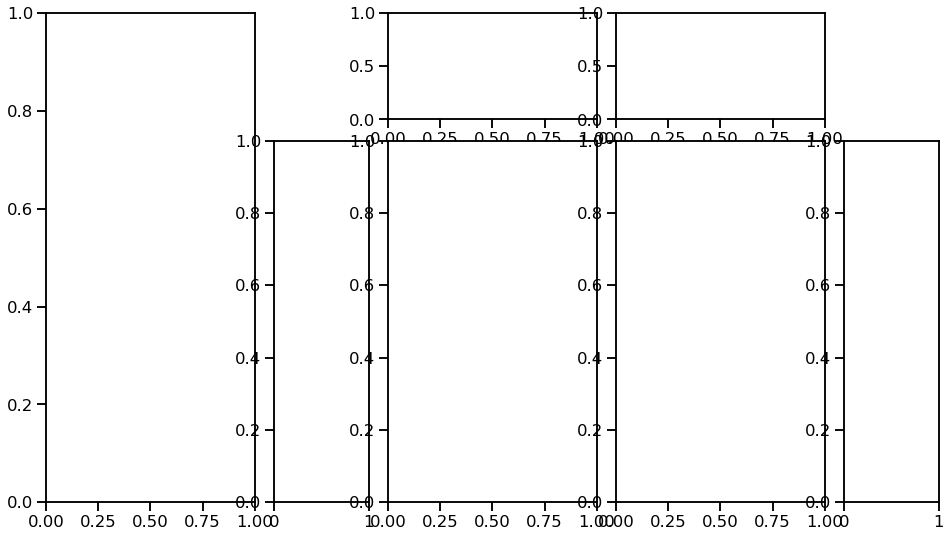

In [15]:
# Equilibration check
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc, phase='production')


ValueError: operands could not be broadcast together with shapes (2501,) (2502,) 

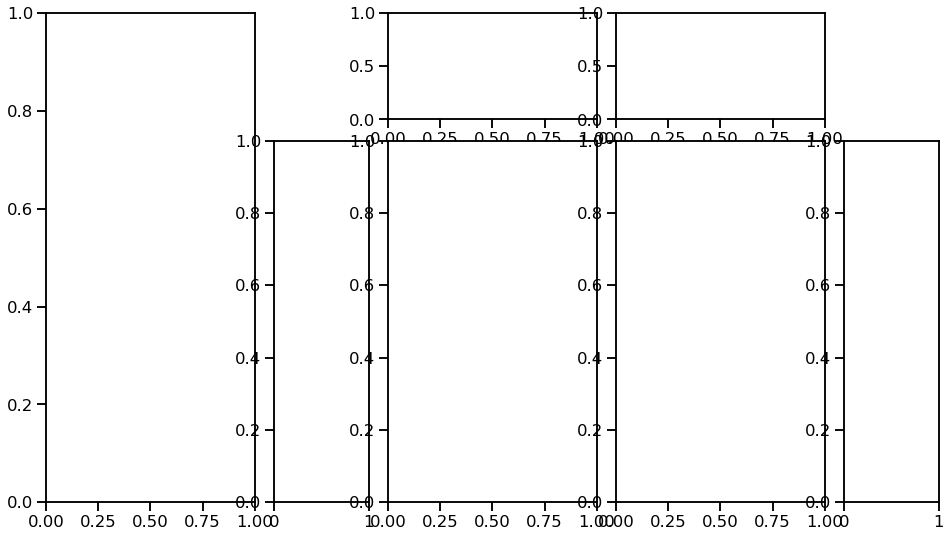

In [14]:
# Production check
postproc.therm.temp_energy_plot(postproc, phase='production')

Text(0.5, 37.44, '$r/a_{ws}$')

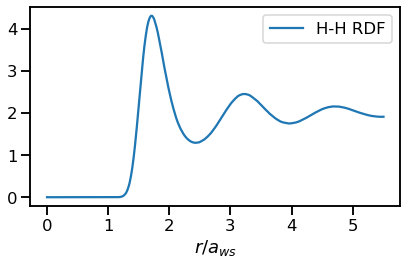

In [10]:
# Radial Distribution Function 
sns.set_context('talk')
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()
ax = postproc.rdf.plot(normalization = postproc.parameters.a_ws)
ax.set_xlabel(r'$r/a_{ws}$')

In [11]:
#DSF
postproc.dsf.setup(postproc.parameters)
postproc.dsf.compute()
postproc.dsf.plot(y = ['H-H DSF ka_min','H-H 3 DSF ka_min','H-H DSF 5 ka_min','H-H DSF 7 ka_min'])

  0%|          | 0/2502 [00:00<?, ?it/s]

Calculating n(k,t).


100%|█████████▉| 2501/2502 [17:15<00:00,  2.42it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'Simulations/yocp_pppm/Production/dumps/checkpoint_5002.npz'

In [13]:
np.math.factorial(6)

720